<a href="https://colab.research.google.com/github/sdasnoon/personal_projects/blob/master/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!pip install pydrive

# **Linear Regression**

**Import Google libraries for authentication and file download**

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

**Authenticating with google to fetch files from google drive**

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

**Download data files**

In [0]:
downloaded = drive.CreateFile({'id':"1M4uCzGvtMIFNptLs7R7Lux3bFE2F6N-s"})  
downloaded.GetContentFile('test.csv')       
downloaded = drive.CreateFile({'id':"1zgKTFsaqRXOCM_CFsO1BCqE6d2-AR8dC"})   
downloaded.GetContentFile('train.csv')       

**Import Numpy, Pandas, Scikit Learn and matplotlib** <br>
Numpy : Number processing <br>
Pandas : dataframe processing <br>
Scikit learn : Machine Learning <br>
Matplotlib : Plotting graphs

In [0]:
# Using Sklearn Library
import numpy as np
import pandas as pd
import os
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt

**Reading train and test data as dataframe**

In [0]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

**Drop rows having null values**

In [0]:
df_train = df_train.dropna()
df_test = df_test.dropna()

**Check Dataframe**

In [0]:
df_train

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [0]:
df_test

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
...,...,...
295,71,68.545888
296,46,47.334876
297,55,54.090637
298,62,63.297171


**Assign train and test data**

In [0]:
x_train = df_train['x']
y_train = df_train['y']
x_test = df_test['x']
y_test = df_test['y']

**Convert to array**

In [0]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

**Change shape of array for readablity by sklearn**

In [0]:
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

**Fit the dataset to Linear Regression Model**

In [0]:
clf = LinearRegression(normalize=True)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

**Print Coefficients , MSE and R2 Square**

In [0]:
print('Coefficients: \n', clf.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test,y_pred))


print(r2_score(y_test,y_pred))

Coefficients: 
 [1.00065638]
Mean squared error: 9.43
0.9888014444327563


**Plot the data points**

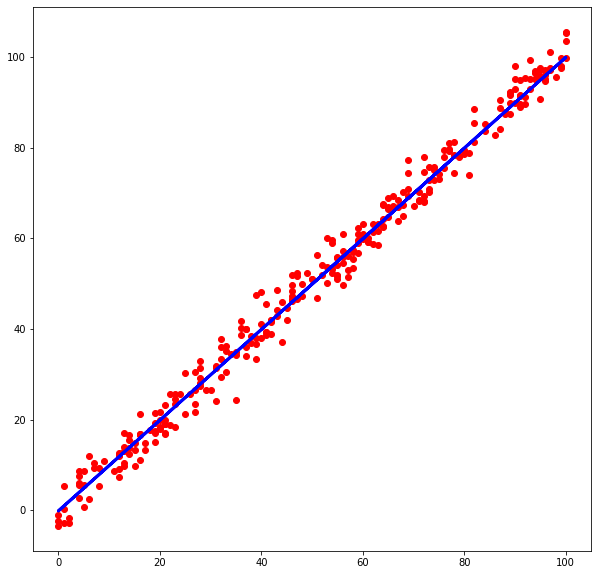

In [0]:
plt.figure(figsize=(10,10))
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test, y_pred, color='blue', linewidth=3)
plt.show()